In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

Задание 1.1.1

In [ ]:
data_MarketingSpend = pd.read_csv('MarketingSpend.csv', header = 0, names = ['Date', 'Offline', 'Online'])

(data_MarketingSpend.iloc[0])

,0
Date,2017-01-01
Offline,4500
Online,2424.5


In [ ]:
data_MarketingSpend['Offline']

,Offline
0,4500
1,4500
2,4500
3,4500
4,4500
...,...
360,4000
361,4000
362,4000
363,4000


In [ ]:
data_MarketingSpend['Online']

,Online
0,2424.50
1,3480.36
2,1576.38
3,2928.55
4,4055.30
...,...
360,3396.87
361,3246.84
362,2546.58
363,674.31


In [ ]:
print(f"Среднее (Offline) продажи: {round(data_MarketingSpend['Offline'].mean(), 3)}")
print(f"Среднее (Online) продажи: {round(data_MarketingSpend['Online'].mean(), 3)}")

print(f"Максимальное (Offline) продажи: {data_MarketingSpend['Offline'].max()}")
print(f"Максимальное (Online) продажи: {data_MarketingSpend['Online'].max()}")

print(f"Минимальное (Offline) продажи: {data_MarketingSpend['Offline'].min()}")
print(f"Минимальное (Online) продажи: {data_MarketingSpend['Online'].min()}")

print(f"Среднее квадратичное (Offline) продажи: {data_MarketingSpend['Offline'].std()}")
print(f"Среднее квадратичное (Online) продажи: {data_MarketingSpend['Online'].std()}")

print(f"Дисперсия (Offline) продажи: {data_MarketingSpend['Offline'].var()}")
print(f"Дисперсия (Online) продажи: {data_MarketingSpend['Online'].var()}")


Среднее (Offline) продажи: 2843.562
Среднее (Online) продажи: 1905.881
Максимальное (Offline) продажи: 5000
Максимальное (Online) продажи: 4556.93
Минимальное (Offline) продажи: 500
Минимальное (Online) продажи: 320.25
Среднее квадратичное (Offline) продажи: 952.2924478420852
Среднее квадратичное (Online) продажи: 808.8568534182692
Дисперсия (Offline) продажи: 906860.9062170705
Дисперсия (Online) продажи: 654249.4093217035


Задание 1.1.2

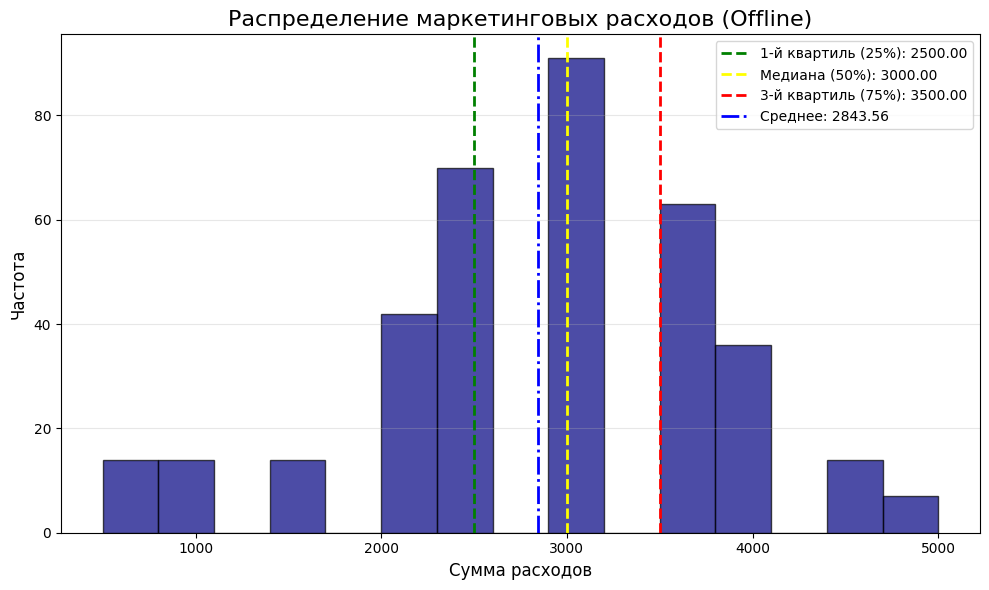

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(data_MarketingSpend['Offline'], bins=15, color='navy', alpha=0.7, edgecolor='black')

quartiles = data_MarketingSpend['Offline'].quantile([0.25, 0.5, 0.75])
mean_value = data_MarketingSpend['Offline'].mean()

quartile_colors = ['green', 'yellow', 'red']
quartile_labels = ['1-й квартиль (25%)', 'Медиана (50%)', '3-й квартиль (75%)']
for q, color, label in zip(quartiles, quartile_colors, quartile_labels):
    plt.axvline(q, color=color, linestyle='--', linewidth=2, label=f'{label}: {q:.2f}')

plt.axvline(mean_value, color='blue', linestyle='-.', linewidth=2, label=f'Среднее: {mean_value:.2f}')

plt.title('Распределение маркетинговых расходов (Offline)', fontsize=16)
plt.xlabel('Сумма расходов', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.show()

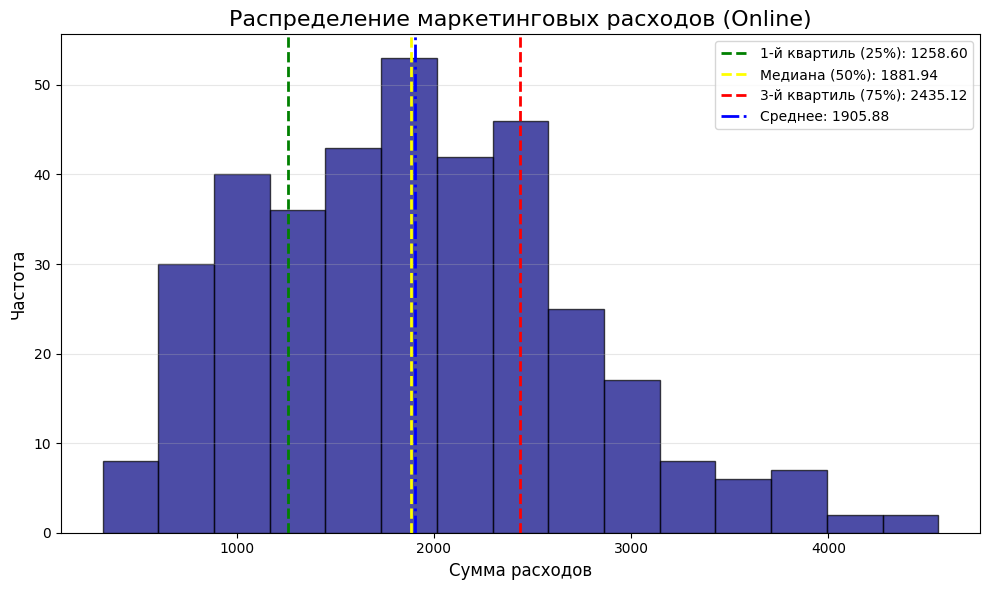

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(data_MarketingSpend['Online'], bins=15, color='navy', alpha=0.7, edgecolor='black')

quartiles = data_MarketingSpend['Online'].quantile([0.25, 0.5, 0.75])
mean_value = data_MarketingSpend['Online'].mean()

quartile_colors = ['green', 'yellow', 'red']
quartile_labels = ['1-й квартиль (25%)', 'Медиана (50%)', '3-й квартиль (75%)']
for q, color, label in zip(quartiles, quartile_colors, quartile_labels):
    plt.axvline(q, color=color, linestyle='--', linewidth=2, label=f'{label}: {q:.2f}')

plt.axvline(mean_value, color='blue', linestyle='-.', linewidth=2, label=f'Среднее: {mean_value:.2f}')

plt.title('Распределение маркетинговых расходов (Online)', fontsize=16)
plt.xlabel('Сумма расходов', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.show()

Задание 1.2.1

In [ ]:
data_Retail = pd.read_csv('Retail.csv', header = 0, names = ['InvoiceNo', 'InvoiceDate', 'StockCode', 'Quantity'])
print(f"Всего Инвойсов: {len(data_Retail['InvoiceNo'])}")

Всего Инвойсов: 181247


Задание 1.2.2

In [ ]:
print(f"Всего заказали итемов: {data_Retail['Quantity'].sum()}")

Всего заказали итемов: 826653


Задание 1.2.3

In [ ]:
print(f"Топ 10 stockcodes, которых заказали наибольшее число раз: {data_Retail['StockCode'].value_counts().head(10)}")

Топ 10 stockcodes, которых заказали наибольшее число раз: StockCode
20725    1549
22197    1357
21212    1325
20727    1281
21931    1162
20728    1145
22086    1083
15056    1070
20724    1022
20726    1009
Name: count, dtype: int64


Задание 2.1

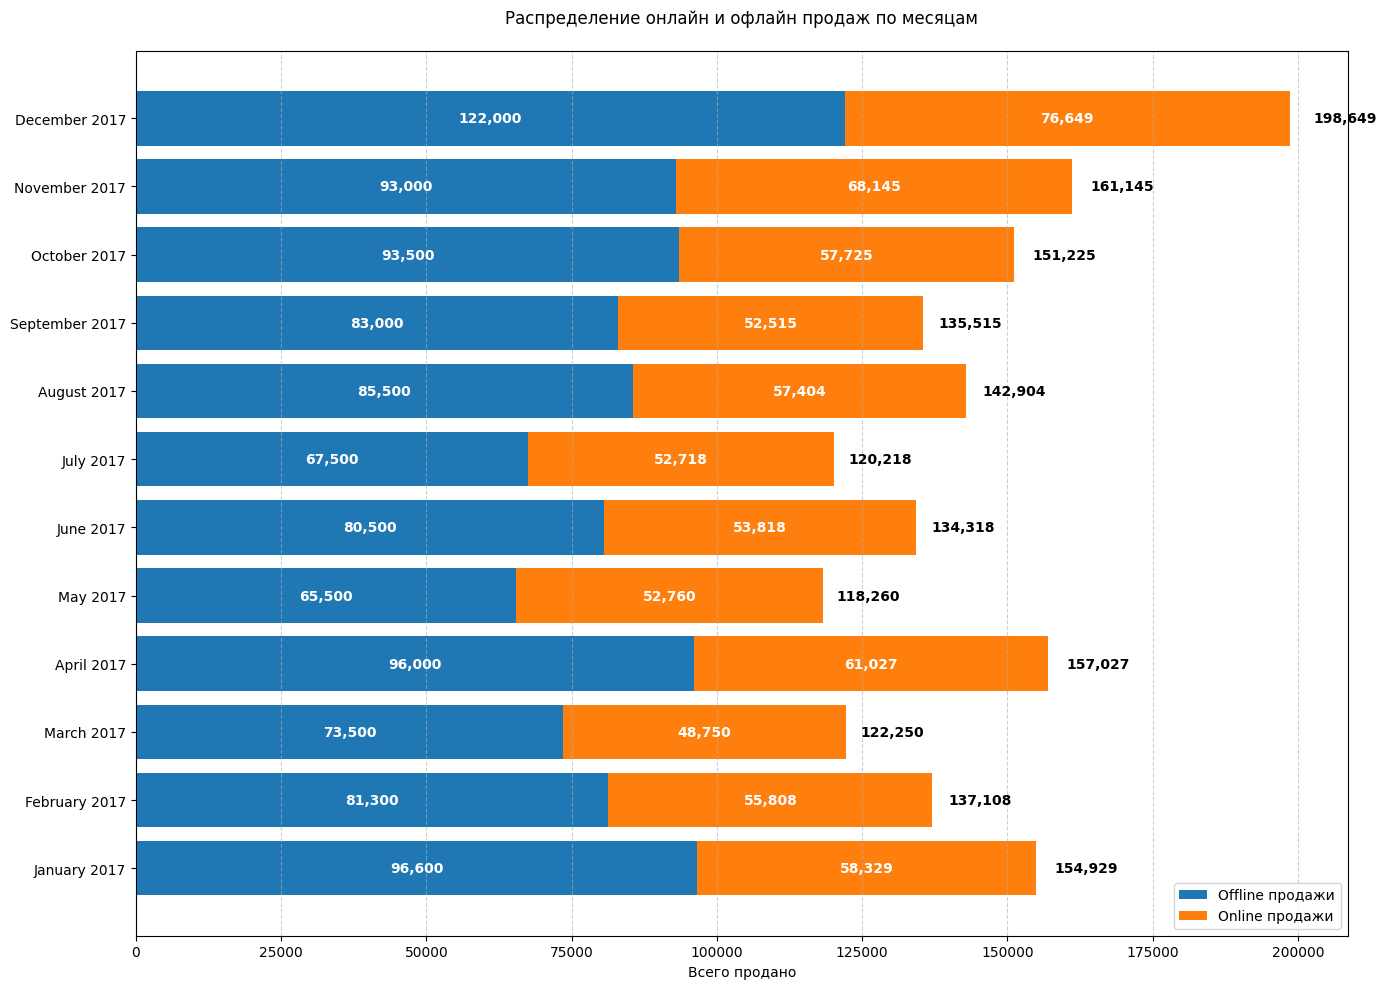

In [ ]:
data1 = pd.read_csv('MarketingSpend.csv', parse_dates=[0], index_col=0)

monthly_data = data1.resample('ME').sum()

fig, ax = plt.subplots(figsize=(14, 10))

colors = ['#1f77b4', '#ff7f0e']
legend_labels = ['Offline продажи', 'Online продажи']

offline_bars = ax.barh(
    range(len(monthly_data)),
    monthly_data['Offline Spend'],
    color=colors[0],
    label=legend_labels[0]
)

online_bars = ax.barh(
    range(len(monthly_data)),
    monthly_data['Online Spend'],
    left=monthly_data['Offline Spend'],
    color=colors[1],
    label=legend_labels[1]
)

for i, (offline, online) in enumerate(zip(monthly_data['Offline Spend'], monthly_data['Online Spend'])):
    total = offline + online
    if offline > 0.05 * total:
        ax.text(
            x=offline / 2,
            y=i,
            s=f'{offline:,.0f}',
            ha='center',
            va='center',
            color='white',
            fontweight='bold'
        )
    if online > 0.05 * total:
        ax.text(
            x=offline + online / 2,
            y=i,
            s=f'{online:,.0f}',
            ha='center',
            va='center',
            color='white',
            fontweight='bold'
        )
    ax.text(
        x=total * 1.02,
        y=i,
        s=f'{total:,.0f}',
        ha='left',
        va='center',
        color='black',
        fontweight='bold'
    )

ax.set_yticks(range(len(monthly_data)))
ax.set_yticklabels([date.strftime('%B %Y') for date in monthly_data.index])
ax.set_xlabel('Всего продано')
ax.set_title(
    'Распределение онлайн и офлайн продаж по месяцам',
    pad=20,
    fontsize=12
)
ax.legend(loc='lower right')


plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Задание 2.2

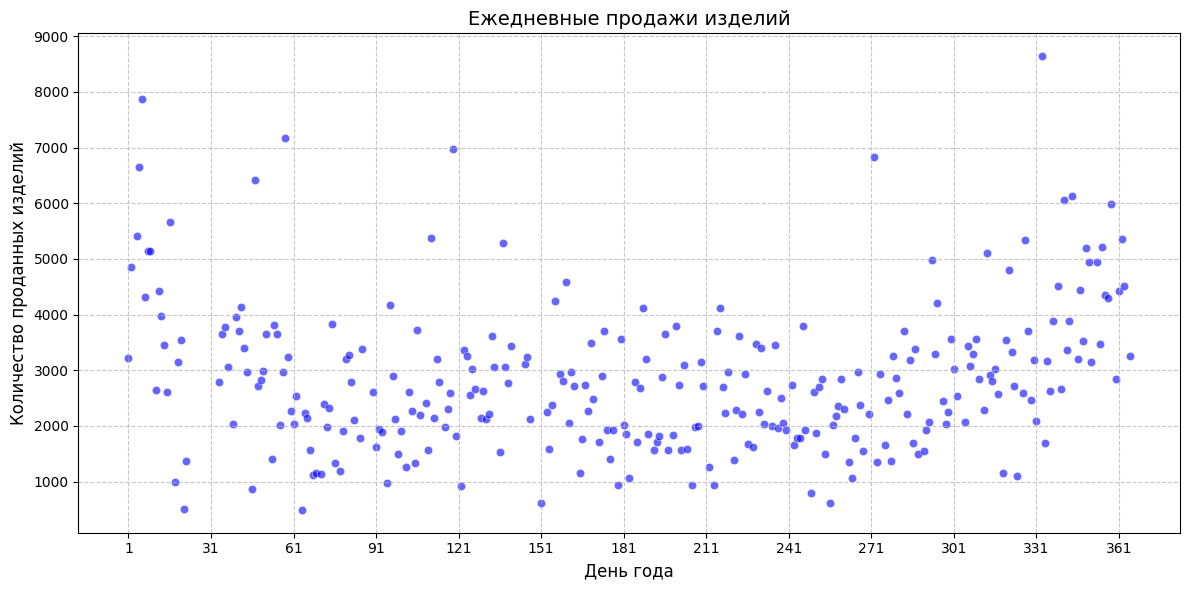

In [ ]:
data = pd.read_csv('Retail.csv')

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

daily_sales = data.groupby(data['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()
daily_sales['InvoiceDate'] = pd.to_datetime(daily_sales['InvoiceDate'])
daily_sales['DayOfYear'] = daily_sales['InvoiceDate'].dt.dayofyear

plt.figure(figsize=(12, 6))
plt.scatter(daily_sales['DayOfYear'], daily_sales['Quantity'], color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)

plt.title('Ежедневные продажи изделий', fontsize=14)
plt.xlabel('День года', fontsize=12)
plt.ylabel('Количество проданных изделий', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(range(1, 366, 30), fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()